In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Numerical features engineering

### Data Summary

In [90]:
data = pd.read_csv('birds2024.csv', delimiter=';')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  50 non-null     object 
 1   group    50 non-null     object 
 2   length   50 non-null     object 
 3   wspan    50 non-null     object 
 4   weight   50 non-null     object 
 5   AR       50 non-null     float64
 6   wload    50 non-null     float64
 7   back     50 non-null     object 
 8   belly    50 non-null     object 
 9   ftype    50 non-null     object 
dtypes: float64(2), object(8)
memory usage: 4.0+ KB


In [91]:
data.head(5)

,species,group,length,wspan,weight,AR,wload,back,belly,ftype
0,naurulokki,laridae,34-38,86-99,200-350,8.13,0.31,light grey,white,B
1,harmaalokki,laridae,55-65,123-148,800-1300,8.24,0.64,bluish grey,white,B
2,isolokki,laridae,63-68,138-158,1000-1800,8.24,0.66,bluish grey,white,B
3,kalatiira,sternidae,36-42,70-80,100-145,9.14,0.24,grey,white,B
4,lapintiira,sternidae,33-37,66-77,90-130,8.97,0.20,grey,white,B


### Numerical Features
All numerical features are expressed in ranges -> taking the **mean** to
get the single values

Then extract the following new features:
- BMI = weight/length^2
- WSI= wspan/length

As a result, the 4 following ratios `AR,wload,BMI,WSI` would
be used in training.

In [92]:
def range_to_mid(r: str) -> float:
    '''
    Return the mid value of a numerical range
    '''
    if not isinstance(r, str) or '-' not in r:
        raise TypeError
    lower_bound, upper_bound = list(map(int,r.split('-')))
    return (lower_bound + upper_bound) / 2


def min_max_scaling(d: np.ndarray) -> np.ndarray:
    min_val = d.min()
    max_val = d.max()
    return (d-min_val) / (max_val - min_val)

def l2_dist(a, b) -> np.ndarray:
    return np.sqrt(np.sum((a - b)**2))


In [93]:
num_range_cols = ['length', 'wspan', 'weight']
# map numerical ranges to their mid points
data[num_range_cols] = data[num_range_cols].map(range_to_mid)
data.rename(columns={col: f'mid_{col}' for col in num_range_cols}, inplace=True)

data.head(5)

,species,group,mid_length,mid_wspan,mid_weight,AR,wload,back,belly,ftype
0,naurulokki,laridae,36.0,92.5,275.0,8.13,0.31,light grey,white,B
1,harmaalokki,laridae,60.0,135.5,1050.0,8.24,0.64,bluish grey,white,B
2,isolokki,laridae,65.5,148.0,1400.0,8.24,0.66,bluish grey,white,B
3,kalatiira,sternidae,39.0,75.0,122.5,9.14,0.24,grey,white,B
4,lapintiira,sternidae,35.0,71.5,110.0,8.97,0.20,grey,white,B


In [94]:
# Calculate two new features BMI and WSI
data['BMI'] = data['mid_weight'] / (data['mid_length'] ** 2)
data['WSI'] = data['mid_wspan'] / data['mid_length']

data.head(5)

,species,group,mid_length,mid_wspan,mid_weight,AR,wload,back,belly,ftype,BMI,WSI
0,naurulokki,laridae,36.0,92.5,275.0,8.13,0.31,light grey,white,B,0.212191,2.569444
1,harmaalokki,laridae,60.0,135.5,1050.0,8.24,0.64,bluish grey,white,B,0.291667,2.258333
2,isolokki,laridae,65.5,148.0,1400.0,8.24,0.66,bluish grey,white,B,0.326321,2.259542
3,kalatiira,sternidae,39.0,75.0,122.5,9.14,0.24,grey,white,B,0.080539,1.923077
4,lapintiira,sternidae,35.0,71.5,110.0,8.97,0.20,grey,white,B,0.089796,2.042857


In [95]:
# Scaling all numerical features
num_features = ['AR', 'wload', 'BMI', 'WSI']
num_features_data = data[num_features]

# min-max scaling
for feature in num_features:
    data.loc[:, feature] = min_max_scaling(data.loc[:, feature])

print(data[num_features])

          AR     wload       BMI       WSI
0   0.762605  0.060185  0.214481  0.879054
1   0.785714  0.212963  0.343958  0.670654
2   0.785714  0.222222  0.400416  0.671464
3   0.974790  0.027778  0.000000  0.446080
4   0.939076  0.009259  0.015081  0.526316
5   0.468487  0.083333  0.144386  0.405667
6   0.296218  0.101852  0.109788  0.239971
7   0.247899  0.166667  0.274415  0.306220
8   0.569328  0.125000  0.222778  0.527379
9   0.567227  0.050926  0.126235  0.393408
10  0.636555  0.023148  0.070750  0.284472
11  0.514706  0.060185  0.087664  0.356585
12  0.447479  0.000000  0.049806  0.430622
13  0.510504  0.027778  0.140032  0.605649
14  0.615546  0.064815  0.142496  0.533816
15  0.615546  0.125000  0.247466  1.000000
16  0.199580  0.074074  0.186983  0.612739
17  0.672269  0.421296  0.407733  0.257333
18  0.422269  0.263889  0.308760  0.199894
19  0.355042  0.402778  0.461207  0.168769
20  0.273109  0.268519  0.324009  0.239971
21  0.623950  0.407407  0.293047  0.239434
22  0.55042

In [96]:
def pairwise_numerical_distance(num_features_data: pd.DataFrame) -> np.ndarray:
    '''
    Return the pairwise Euclidean distances (L2 norm)
    '''
    n = len(num_features_data)
    pairwise_num_dists = np.zeros((n,n))
    for i in range(n):
        birdI = num_features_data.iloc[i]
        for j in range(n):        
            birdJ = num_features_data.iloc[j]
            pairwise_num_dists[i,j] = l2_dist(birdI, birdJ)
    return pairwise_num_dists


def std_pairwise_distance(dist_mat: np.ndarray) -> float:
    '''
    Return the standard deviation of the given pairwise distance matrix
    '''
    temp_mat = dist_mat
    if dist_mat.shape[0] == dist_mat.shape[1]:
        # extract the indices of upper triangle
        upper_tria_indices = np.triu_indices_from(dist_mat, k=1)
        temp_mat = dist_mat[upper_tria_indices]
    return np.std(temp_mat, ddof=1)

In [97]:
pairwise_num_dists = pairwise_numerical_distance(data[num_features])
std_pairwise_num_dists = std_pairwise_distance(pairwise_num_dists)

print('Pairwise numerical feature distance matrix:')
print(pairwise_num_dists)
print(f'Standard deviation of pairwise numerical feature distance: {std_pairwise_num_dists}')

Pairwise numerical feature distance matrix:
[[0.         0.28994804 0.3231956  ... 0.54444967 0.24019708 1.02032937]
 [0.28994804 0.         0.05721752 ... 0.57104447 0.39839163 0.92472452]
 [0.3231956  0.05721752 0.         ... 0.59242965 0.41075354 0.88532399]
 ...
 [0.54444967 0.57104447 0.59242965 ... 0.         0.44176098 0.86362052]
 [0.24019708 0.39839163 0.41075354 ... 0.44176098 0.         0.84496784]
 [1.02032937 0.92472452 0.88532399 ... 0.86362052 0.84496784 0.        ]]
Standard deviation of pairwise numerical feature distance: 0.2713192529988215


### Categorical features - Color features
The idea is to use semantic similarity wherea hierarchy of colors (e.g. different shades of grey
grouped under "grey") are used to compute a distance between them. For example, 'light grey'
and 'bluish grey' should be closer because they share the main 'grey' color.

In [98]:
from webcolors import IntegerRGB, name_to_rgb
import Levenshtein

MAX_L2_RGB_DISTANCE = np.sqrt(255**2 * 3)
# a weight for combination of normalized distances of a color, including
# modifier and main color
MAIN_COLOR_DIST_WEIGHT = 0.8

def color_extraction(color_str: str) -> list:
    '''
    Extract modifier and main_color from a given color string
    e.g. "light grey" -> "light", "grey"
    '''
    color_elements = color_str.split(' ')
    if len(color_elements) == 1:
        return ['', color_str]
    
    return color_elements


def rgb_to_array(rgb: IntegerRGB) -> np.ndarray:
    return np.array([rgb.red, rgb.green, rgb.blue])


def color_to_rgb(color_str: str) -> np.ndarray:
    '''
    Return RGB value of a given color string
    e.g.    'red' -> [255,0,0]
            'blue' -> [0,0,255]
    '''
    if '-' in color_str:
        c1,c2 = color_str.split('-')
        rgb1 = name_to_rgb(c1)
        rgb2 = name_to_rgb(c2)

        rgb1 = rgb_to_array(rgb1)
        rgb2 = rgb_to_array(rgb2)
        rgb = (rgb1 + rgb2) / 2
    else:
        rgb = rgb_to_array(name_to_rgb(color_str))
    return rgb


def main_color_rgb_dist(main_color1: str, main_color2: str) -> float:
    '''
    Return the L2 RGB distance between two given main color strings
    '''
    rgb1 = color_to_rgb(main_color1)
    rgb2 = color_to_rgb(main_color2)
    return l2_dist(rgb1, rgb2) / MAX_L2_RGB_DISTANCE # normalized


def levenshtein_dist(str1: str, str2: str) -> float:
    '''
    Return Levenshtein distance between two given strings
    '''
    if len(str1) + len(str2) == 0:
        return 0
    # normalized by the maximum string length
    return Levenshtein.distance(str1, str2) / max(len(str1), len(str2))


def color_dist(color1: str, color2: str) -> float:
    '''
    Return color distance between the two given color strings.
    This custom color distance includes two components: modifier
    distance and main color distance, where each component has its
    own weight.

    D = modifier_weight * modifier_distance + main_color_weight * main_color_distance,
    modifier_weight + main_color_weight = 1
    '''
    modifier1, main_color1 = color_extraction(color1)
    modifier2, main_color2 = color_extraction(color2)

    main_color_dist = main_color_rgb_dist(main_color1, main_color2)
    modifier_dist = levenshtein_dist(modifier1, modifier2)

    return (1-MAIN_COLOR_DIST_WEIGHT)*modifier_dist + MAIN_COLOR_DIST_WEIGHT*main_color_dist



In [99]:
color_features = ['back', 'belly']
color_data = data[color_features]

# extract main colors and modifiers
main_colors_set = set()
modifiers_set = set()

n = len(color_data)
for i in range(n):
    rowI = color_data.iloc[i]
    for col in color_features:
        modifier,  main_color= color_extraction(rowI[col])
        if not main_color is None:
            main_colors_set.add(main_color)
        if not modifier is None:
            modifiers_set.add(modifier)

print('Main colors:')
print(main_colors_set)
print('Modifiers:')
print(modifiers_set)

Main colors:
{'white', 'black-brown', 'brown', 'black-white', 'grey', 'black', 'beige', 'brown-white'}
Modifiers:
{'', 'light', 'dark', 'bluish', 'reddish', 'greyish', 'blackish', 'dappled', 'brownish'}


In [100]:
def pairwise_color_distance(color_data: pd.DataFrame, color_features: list) -> np.ndarray:
    '''
    Return the custom pairwise color distance
    '''
    pairwise_color_dists = np.zeros((n,n))
    for i in range(n):
        birdI = color_data.iloc[i]
        for j in range(n):        
            birdJ = color_data.iloc[j]
            # Calculate pairwise color distance here
            dist = sum([color_dist(birdI[feature], birdJ[feature]) for feature in color_features])
            pairwise_color_dists[i,j] = dist / len(color_features)

    return pairwise_color_dists

In [101]:
pairwise_color_dists = pairwise_color_distance(data[color_features], color_features)
std_pairwise_color_dists = std_pairwise_distance(pairwise_color_dists)

print('Pairwise color feature distance matrix:')
print(pairwise_color_dists)
assert pairwise_color_dists.shape == (50,50)

Pairwise color feature distance matrix:
[[0.         0.06666667 0.06666667 ... 0.35749231 0.59985336 0.49985336]
 [0.06666667 0.         0.         ... 0.35749231 0.59985336 0.49985336]
 [0.06666667 0.         0.         ... 0.35749231 0.59985336 0.49985336]
 ...
 [0.35749231 0.35749231 0.35749231 ... 0.         0.34236104 0.14236104]
 [0.59985336 0.59985336 0.59985336 ... 0.34236104 0.         0.2       ]
 [0.49985336 0.49985336 0.49985336 ... 0.14236104 0.2        0.        ]]


### Combination of numerical and color feature distance

In [102]:
def pairwise_mixed_distance(pairwise_num_distances: np.ndarray,
                            std_pairwise_num_dists: float,
                            pairwise_color_distances: np.ndarray,
                            std_pairwise_color_dists: float,
                            l: int) -> np.ndarray:
    '''
    Return the pairwise mixed distance.
    `l` is the fraction of number of numerical features
    '''
    return l*pairwise_num_distances/std_pairwise_num_dists + (1-l)*pairwise_color_distances/std_pairwise_color_dists

In [103]:
l = 1/len(num_features) # fraction of numerical features
pairwise_mixed_dists = pairwise_mixed_distance(pairwise_num_dists,
                                               std_pairwise_num_dists,
                                               pairwise_color_dists,
                                               std_pairwise_color_dists,
                                               l)

print(f'Pairwise mixed distance matrix:\n{pairwise_mixed_dists}')
assert pairwise_mixed_dists.shape == (50,50), f'got {pairwise_mixed_dists.shape}, expected (50,50)'

Pairwise mixed distance matrix:
[[0.         0.54215356 0.57278865 ... 1.97626323 2.69561533 3.00196492]
 [0.54215356 0.         0.05272158 ... 2.00076831 2.84137955 2.91387234]
 [0.57278865 0.05272158 0.         ... 2.02047312 2.85277011 2.87756777]
 ...
 [1.97626323 2.00076831 2.02047312 ... 0.         1.81922954 1.38297529]
 [2.69561533 2.84137955 2.85277011 ... 1.81922954 0.         1.60353906]
 [3.00196492 2.91387234 2.87756777 ... 1.38297529 1.60353906 0.        ]]


### Agglomerative Hierarchical Clustering

In [104]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import normalized_mutual_info_score
from sklearn.preprocessing import LabelEncoder

import itertools

le = LabelEncoder()

In [105]:
# explore combinations of numerical and color features
num_features = ['AR', 'wload', 'BMI', 'WSI']
color_features = ['back', 'belly']

combined_list = num_features + color_features

feature_combinations = []
for length in range(2, len(combined_list) + 1):
    for combination in itertools.combinations(combined_list, length):
        # make sure that the combination contains both numerical and color feature
        if any(item in num_features for item in combination) and any(item in color_features for item in combination):
            feature_combinations.append(combination)

print(feature_combinations)

[('AR', 'back'), ('AR', 'belly'), ('wload', 'back'), ('wload', 'belly'), ('BMI', 'back'), ('BMI', 'belly'), ('WSI', 'back'), ('WSI', 'belly'), ('AR', 'wload', 'back'), ('AR', 'wload', 'belly'), ('AR', 'BMI', 'back'), ('AR', 'BMI', 'belly'), ('AR', 'WSI', 'back'), ('AR', 'WSI', 'belly'), ('AR', 'back', 'belly'), ('wload', 'BMI', 'back'), ('wload', 'BMI', 'belly'), ('wload', 'WSI', 'back'), ('wload', 'WSI', 'belly'), ('wload', 'back', 'belly'), ('BMI', 'WSI', 'back'), ('BMI', 'WSI', 'belly'), ('BMI', 'back', 'belly'), ('WSI', 'back', 'belly'), ('AR', 'wload', 'BMI', 'back'), ('AR', 'wload', 'BMI', 'belly'), ('AR', 'wload', 'WSI', 'back'), ('AR', 'wload', 'WSI', 'belly'), ('AR', 'wload', 'back', 'belly'), ('AR', 'BMI', 'WSI', 'back'), ('AR', 'BMI', 'WSI', 'belly'), ('AR', 'BMI', 'back', 'belly'), ('AR', 'WSI', 'back', 'belly'), ('wload', 'BMI', 'WSI', 'back'), ('wload', 'BMI', 'WSI', 'belly'), ('wload', 'BMI', 'back', 'belly'), ('wload', 'WSI', 'back', 'belly'), ('BMI', 'WSI', 'back', 'be

In [106]:
# paramater tuning
n_clusters_range = range(5,13)
# 'ward' linkage cannot be used if metric='precomputed'
linkages = ['complete', 'average', 'single']
results = []

true_labels = data['group'] # label of biological groups
true_labels_enc = le.fit_transform(true_labels)


for feat_comb in feature_combinations:
    # loop different combinations of features
    local_num_feats = [feat for feat in feat_comb if feat in num_features]
    local_color_feats = [feat for feat in feat_comb if feat in color_features]
    local_num_data = data[local_num_feats]
    local_color_data = data[local_color_feats]

    local_pairwise_num_dists = pairwise_numerical_distance(local_num_data)
    local_std_pairwise_num_dists = std_pairwise_distance(local_pairwise_num_dists)

    local_pairwise_color_dists = pairwise_color_distance(local_color_data, local_color_feats)
    local_std_pairwise_color_dists = std_pairwise_distance(local_pairwise_color_dists)

    l = 1/len(local_num_feats) # fraction of numerical features
    local_pairwise_mixed_dists = pairwise_mixed_distance(local_pairwise_num_dists,
                                               local_std_pairwise_num_dists,
                                               local_pairwise_color_dists,
                                               local_std_pairwise_color_dists,
                                               l)

    for linkage in linkages:
        # loop through different linkages
        for n_clusters in n_clusters_range:
            # loop through different number of clusters
            clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric='precomputed')

            predicted_labels = clustering.fit_predict(local_pairwise_mixed_dists)
            labels_count = np.bincount(predicted_labels)
            if 1 in labels_count:
                # if there is a singleton cluster, skip this parameter set
                # as the NMI deals poorly with singleton clusters.
                continue
            
            nmi = normalized_mutual_info_score(true_labels_enc, predicted_labels)


            results.append((local_num_feats, local_color_feats, n_clusters, linkage, nmi))

results_df = pd.DataFrame(results, columns=['numerical_features', 'color_features', 'n_clusters', 'linkage', 'NMI'])

# Find the best configuration based on NMI
best_config = results_df.loc[results_df['NMI'].idxmax()]
print("\nBest Configuration Based on NMI Score:")
print(best_config)


Best Configuration Based on NMI Score:
numerical_features    [AR, wload, WSI]
color_features                  [back]
n_clusters                          11
linkage                       complete
NMI                           0.662982
Name: 102, dtype: object


In [107]:
# Show parameter sets which generate NMI > 0.6 (high NMI)
results_df[results_df['NMI'] > 0.6].sort_values(by='NMI', ascending=False)

,numerical_features,color_features,n_clusters,linkage,NMI
102,"[AR, wload, WSI]",[back],11,complete,0.662982
100,"[AR, wload, WSI]",[back],9,complete,0.654090
175,"[AR, wload, WSI]","[back, belly]",10,complete,0.644018
101,"[AR, wload, WSI]",[back],10,complete,0.640508
42,"[AR, WSI]",[back],9,complete,0.639154
145,"[wload, WSI]","[back, belly]",10,complete,0.638173
61,"[wload, WSI]",[back],8,complete,0.626040
64,"[wload, WSI]",[back],7,average,0.621079
115,"[AR, wload]","[back, belly]",11,complete,0.618251
41,"[AR, WSI]",[back],8,complete,0.617868


In [108]:
# Clustering with the best config
best_num_features = best_config['numerical_features']
best_color_features = best_config['color_features']
best_num_data = data[best_num_features]
best_color_data = data[best_color_features]

best_pairwise_num_dists = pairwise_numerical_distance(best_num_data)
best_std_pairwise_num_dists = std_pairwise_distance(best_pairwise_num_dists)

best_pairwise_color_dists = pairwise_color_distance(best_color_data, best_color_features)
best_std_pairwise_color_dists = std_pairwise_distance(best_pairwise_color_dists)

l = 1/len(best_num_features) # fraction of numerical features
best_pairwise_mixed_dists = pairwise_mixed_distance(best_pairwise_num_dists,
                                            best_std_pairwise_num_dists,
                                            best_pairwise_color_dists,
                                            best_std_pairwise_color_dists,
                                            l)

print('Best pairwise mixed distance matrix')
print(best_pairwise_mixed_dists)

best_clustering = AgglomerativeClustering(n_clusters=best_config['n_clusters'], linkage=best_config['linkage'], metric='precomputed')
best_labels = best_clustering.fit_predict(best_pairwise_mixed_dists)
# Add the predicted labels into new column 'cluster'
data['cluster'] = best_labels

Best pairwise mixed distance matrix
[[0.         0.78170964 0.78833134 ... 2.12771396 1.69627705 2.27232142]
 [0.78170964 0.         0.01250393 ... 2.134409   1.92951722 2.27303644]
 [0.78833134 0.01250393 0.         ... 2.13907541 1.93336813 2.27259534]
 ...
 [2.12771396 2.134409   2.13907541 ... 0.         1.22170343 0.38681552]
 [1.69627705 1.92951722 1.93336813 ... 1.22170343 0.         1.29315045]
 [2.27232142 2.27303644 2.27259534 ... 0.38681552 1.29315045 0.        ]]


### Compare the final clustering and the clustering of biology groups

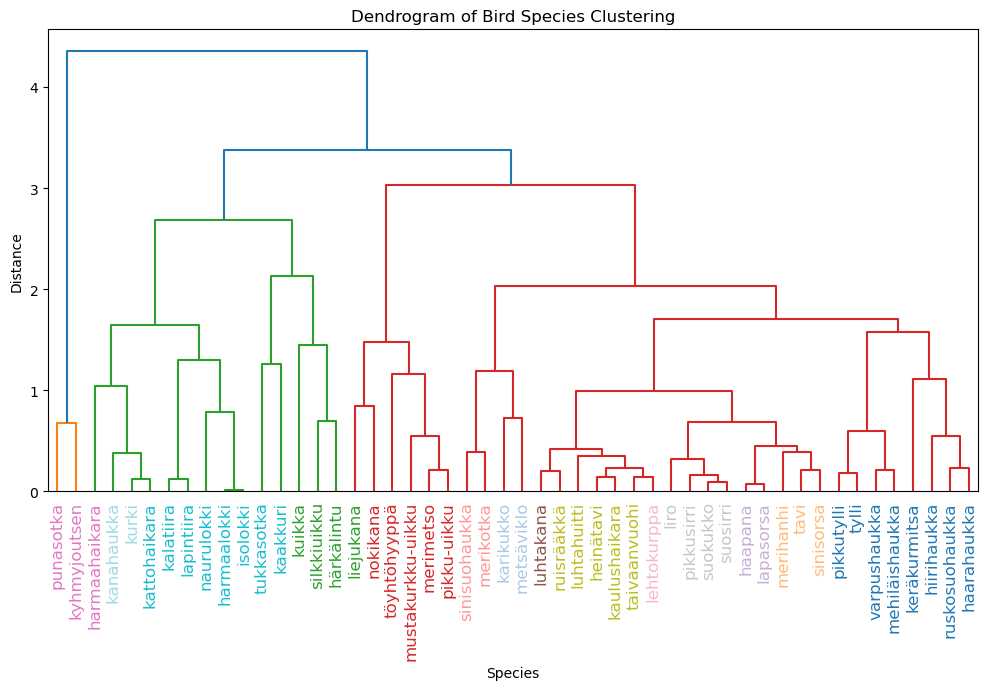

In [109]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform


# Automatically assign a distinct color to each unique biological group using matplotlib's colormap
unique_groups = np.unique(true_labels)
num_groups = len(unique_groups)

# Generate a color palette using matplotlib's 'tab20' colormap
colors = plt.colormaps['tab20'](np.linspace(0, 1, num_groups))

# Create a dynamic color mapping for each group
label_colors = dict(zip(unique_groups, colors))

# Map the true labels to their corresponding colors dynamically
color_labels = [label_colors[label] for label in true_labels]

# Perform hierarchical clustering using `scipy`'s `linkage`
condensed_distances = squareform(best_pairwise_mixed_dists)
Z = linkage(condensed_distances, method=best_config['linkage'])

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    labels=data['species'].values,  # Use species names as labels
    leaf_rotation=90,  # Rotate leaf labels for readability
    leaf_font_size=12,  # Leaf font size
)

# Add color labels based on biological groups
for idx, label in enumerate(plt.gca().get_xticklabels()):
    label.set_color(color_labels[idx])

# Add title and labels
plt.title('Dendrogram of Bird Species Clustering')
plt.xlabel('Species')
plt.ylabel('Distance')
plt.show()

In [115]:
pd.set_option('display.max_colwidth', None)  # No limit on the width of columns
pd.set_option('display.width', 1000)  # Set a large width for the display

# inspect the correlation between the cluster labels and biology groups
taken_account_features = ['species'] + best_num_features + best_color_features + ['group', 'ftype','cluster']
data[taken_account_features].sort_values(by='cluster')

,species,AR,wload,WSI,back,group,ftype,cluster
38,kuikka,0.932773,1.000000,0.293071,black-white,gaviidae,C,0
33,silkkiuikku,0.707983,0.537037,0.000000,blackish grey,podicipedidae,C,0
34,härkälintu,0.415966,0.754630,0.363636,blackish grey,podicipedidae,C,0
4,lapintiira,0.939076,0.009259,0.526316,grey,sternidae,B,1
0,naurulokki,0.762605,0.060185,0.879054,light grey,laridae,B,1
3,kalatiira,0.974790,0.027778,0.446080,grey,sternidae,B,1
2,isolokki,0.785714,0.222222,0.671464,bluish grey,laridae,B,1
1,harmaalokki,0.785714,0.212963,0.670654,bluish grey,laridae,B,1
22,tukkasotka,0.550420,0.620370,0.212726,dark brown,diving ducks,C,2
37,kaakkuri,1.000000,0.675926,0.261511,greyish brown,gaviidae,C,2
